# Troy Quicksall
# DSC 630
# Week 3 Assignment
# Using Data to Improve MLB Attendance

In [1]:
# Importing the dataset
import pandas as pd

dodgers_df = pd.read_csv('dodgers-2022.csv')

dodgers_df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


## Step 1: Uderstanding the Data and Initial EDA

First I will complete some initial exploratory data analysis to see if there are any clear correlations between independent variables and attendance.

### Exploring attendance by day of the week

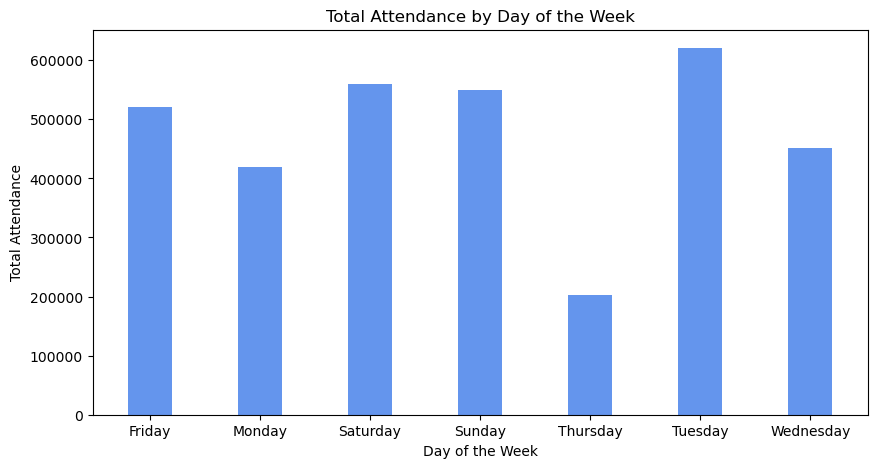

In [2]:
import matplotlib.pyplot as plt

# Creating new dataframe from grouping by day of week and summing up attendance.

day_of_week_df = dodgers_df.groupby(['day_of_week'], as_index=False)['attend'].sum()

# Bar graph of attendance by day of the week.

days = day_of_week_df['day_of_week']
attendance = day_of_week_df['attend']
  
fig = plt.figure(figsize = (10, 5))

plt.bar(days, attendance, color ='cornflowerblue', 
        width = 0.4)
 
plt.xlabel("Day of the Week")
plt.ylabel("Total Attendance")
plt.title("Total Attendance by Day of the Week")
plt.show()

### Doing a Similar Exploration for Month

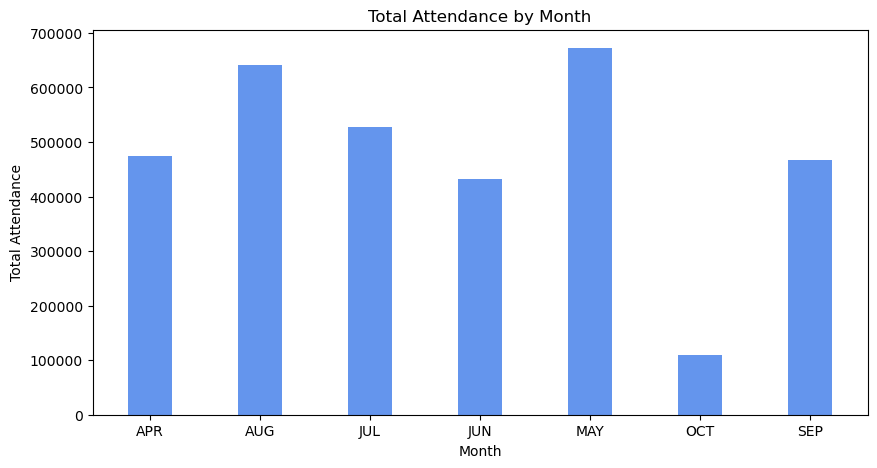

In [3]:
# Creating new dataframe from grouping by month and summing up attendance.

month_df = dodgers_df.groupby(['month'], as_index=False)['attend'].sum()

# Bar graph of attendance by month.

days = month_df['month']
attendance = month_df['attend']
  
fig = plt.figure(figsize = (10, 5))

plt.bar(days, attendance, color ='cornflowerblue', 
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Total Attendance")
plt.title("Total Attendance by Month")
plt.show()

### Examining Attendance Vs. Day of the Month

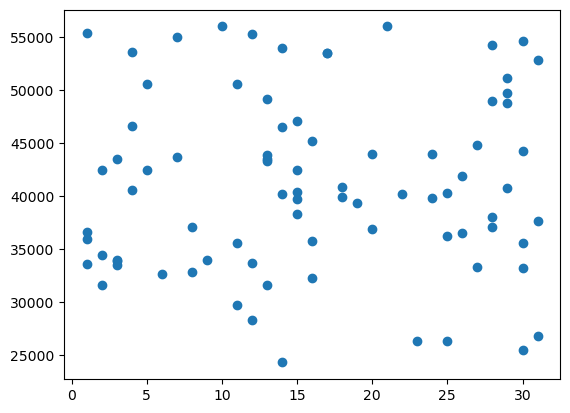

In [4]:
plt.scatter(dodgers_df['day'], dodgers_df['attend'])
plt.show()

### Looking at Attendance Based on Attractions (cap, shirts, fireworks, etc.)

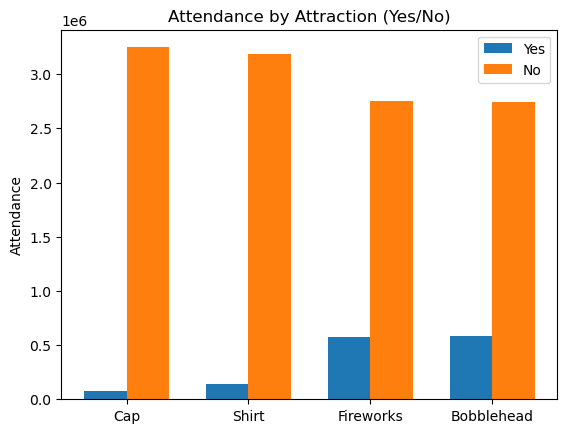

In [5]:
import numpy as np
# Creating labels for attractions
labels = ['Cap', 'Shirt', 'Fireworks', 'Bobblehead']

# Creating attendances based off "YES" or "NO" values for each grouped dataframe

cap_df = dodgers_df.groupby(['cap'], as_index=False)['attend'].sum()
cap_yes = cap_df.loc[cap_df['cap']=='YES']['attend']
cap_no = cap_df.loc[cap_df['cap']=='NO']['attend']
shirt_df = dodgers_df.groupby(['shirt'], as_index=False)['attend'].sum()
shirt_yes = shirt_df.loc[shirt_df['shirt']=='YES']['attend']
shirt_no = shirt_df.loc[shirt_df['shirt']=='NO']['attend']
fireworks_df = dodgers_df.groupby(['fireworks'], as_index=False)['attend'].sum()
fireworks_yes = fireworks_df.loc[fireworks_df['fireworks']=='YES']['attend']
fireworks_no = fireworks_df.loc[fireworks_df['fireworks']=='NO']['attend']
bobblehead_df = dodgers_df.groupby(['bobblehead'], as_index=False)['attend'].sum()
bobblehead_yes = bobblehead_df.loc[bobblehead_df['bobblehead']=='YES']['attend']
bobblehead_no = bobblehead_df.loc[bobblehead_df['bobblehead']=='NO']['attend']

yes_values = [cap_yes.iloc[0], shirt_yes.iloc[0], fireworks_yes.iloc[0], bobblehead_yes.iloc[0]]
no_values = [cap_no.iloc[0], shirt_no.iloc[0], fireworks_no.iloc[0], bobblehead_no.iloc[0]]

# the label locations
x = np.arange(len(labels))  
width = 0.35

fig, ax = plt.subplots()
yes_bars = ax.bar(x - width/2, yes_values, width, label='Yes')
no_bars = ax.bar(x + width/2, no_values, width, label='No')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attendance')
ax.set_title('Attendance by Attraction (Yes/No)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



## Summary of EDA

My analysis of months and days of the week versus attendance show that attendance is higher during the months of May and August. However, the data doesn't show any correlation between the day of the month and attendance. Additionally my analysis does not show that attendance is higher when attractions are introduced like, caps, shirts, fireworks, or bobbleheads. However, of those attractions bobbleheads show the highest attendance when present. 

While it is important to know what time of year attendance is highest, MLB teams are not entirely in control of their schedule. The Dodgers could use the knowledge of when attendance is likely to be higher in order to strategically offer more attractions like bobbleheads and fireworks during the periods of higher attendence. I believe this would be a way of capitalizing on pre-existing attendance trends.

While this analysis is insightful, a lot of the independant vaiables with a high correlation with attendance are out of the team's control. Therefore I will construct a linear regression model in order to examine the statistical significance of each independent variable.

## Linear Regression Model and Analysis

In [6]:
import statsmodels.formula.api as smf 
  
dodgers_df = dodgers_df.replace(['YES', 'NO'], [1, 0])

# Creating dummy variables for categorical variables
dodgers_df = pd.get_dummies(dodgers_df, prefix=['opponent', 'skies', 'day_night'],
                            columns=['opponent', 'skies', 'day_night'])

# Using OLS model to utilize summary function and get p-values of independant variables.


dodgers_df = dodgers_df.rename(columns={'opponent_White Sox': 'opponent_White_Sox', 'skies_Clear ': 'skies_Clear'})
model = smf.ols(formula= 'attend ~ month+day+day_of_week+temp+cap+shirt+fireworks+bobblehead+opponent_Angels+'
                +'opponent_Astros+opponent_Braves+opponent_Brewers+opponent_Cardinals+opponent_Cubs+'
                +'opponent_Giants+opponent_Marlins+opponent_Mets+opponent_Nationals+opponent_Padres+'
                +'opponent_Phillies+opponent_Pirates+opponent_Reds+opponent_Rockies+opponent_Snakes+opponent_White_Sox+'
                +'skies_Clear+skies_Cloudy+day_night_Day+day_night_Night', 
                data=dodgers_df).fit() 
  
# model summary 
print(model.summary()) 


                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     3.057
Date:                Sun, 31 Mar 2024   Prob (F-statistic):           0.000249
Time:                        18:31:07   Log-Likelihood:                -794.60
No. Observations:                  81   AIC:                             1663.
Df Residuals:                      44   BIC:                             1752.
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

## Summary of Linear Regression Model and Analysis

After running the OLS Linear Regression model, the R2 statistic of the model is .71. This means the variance in attendance can be explained by the independent variables. More importantly we can see based of the p-values which independent variables help explain variance in our dependant variable the best. A low p-value means the null hypothesis, or the likelihood the independent variable has no statistical significance, is unlikely. 

The independent variables with p-values lower that .05 (generally considered statistically significant) are; Saturday, Sunday, Tuesday, Thursday, Wednesday, fireworks, bobbleheaeds, and opponents as the Snakes. 

Some of these findings confirm my earlier hypothesis that the attractions that are most likely to generate higher attendance are fireworks and bobbleheads. Again, most of these variables that help the most to influence attendance are out of the Dodger's control. But for games that take place on high attendance days of the week, or that are against the Snakes, the identified attractions can be strategically marketed to help draw larger crowds.

## Overall Recommendation and Summary

Many of my findings from EDA and Linear Regression show that some of the most influential independent variables on attendance are out of control of the Dodgers, i.e. factors to do with scheduling, weather, etc. However, both stages of my analysis confirm that the attractions in control of the Dodgers that are most likely to generate higher attendance are fireworks and bobbleheads. So, for games that take place on high attendance days of the week, or that are against the Snakes (the opponent with most attendance), the identified attractions can be strategically marketed to help draw even larger crowds.

## References

Wikimedia Foundation. (2024, March 30). Major League Baseball Schedule. Wikipedia. https://en.wikipedia.org/wiki/Major_League_Baseball_schedule 